# Ag Analytics- BoundaryAI -Demo

Common Land Unit (CLU) boundaries are farm/field boundaries used by United States Department of Agriculture (USDA) in the delivery of certain farm programs.



In [ ]:
import requests
import json
import time
from pandas.io.json import json_normalize
import requests, zipfile, io
%matplotlib inline
import geopandas as gpd
%autosave 0

### API Details

####Request URL:https://ag-analytics.azure-api.net/CommonLandUnitBoundary/get?geometry={geometry}

####Request parameters:

***geometry - *** string - The geometry to apply as the spatial filter.
The structure of the geometry is the same as the structure of the json/geojson



***f - ***  string(geojson/json)




In order to get Ocp-Apim-Subscription-Key, please click on this link https://analytics.ag/Session/SignInToAPIPaymentt



In [ ]:
geometry={"xmin":-88,"ymin":40.2,"xmax":-88.126,"ymax":40.22,"spatialReference":{"wkid":4326}}
f="geojson"
headers={'Ocp-Apim-Subscription-Key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'}

### API Function

In [ ]:
def get_reverse_geocode_data(geometry,f,headers):
    try:
        url = 'https://ag-analytics.azure-api.net/CommonLandUnitBoundary/get?geometry={}&f={}'.format(geometry,f)
        
        
        
        response = (requests.get(url,headers=headers).text)
      
                
        print(response)

        
        response_json = json.dumps(response)
        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e

### Calling API and Displaying Response API

In [20]:
clu=get_reverse_geocode_data(geometry,f,headers)

{"type":"FeatureCollection","crs":{"type":"name","properties":{"name":"EPSG:4326"}},"features":[{"type":"Feature","id":4166436,"geometry":{"type":"Polygon","coordinates":[[[-88.00395,40.197919],[-88.003955,40.200814],[-88.007578,40.20089],[-88.008708,40.200302],[-88.009195,40.199943],[-88.009672,40.199352],[-88.009672,40.197926],[-88.00395,40.197919]]]},"properties":{"OBJECTID":4166436,"CALCACRES":36.27999878,"CALCACRES2":null}},{"type":"Feature","id":4167422,"geometry":{"type":"Polygon","coordinates":[[[-88.01045,40.201013],[-88.010456,40.201441],[-88.010784,40.201438],[-88.010745,40.201711],[-88.011059,40.201708],[-88.011033,40.202017],[-88.012063,40.20202],[-88.012058,40.201654],[-88.012084,40.201425],[-88.012353,40.201422],[-88.01235,40.201216],[-88.012337,40.201028],[-88.010554,40.201017],[-88.01045,40.201013]]]},"properties":{"OBJECTID":4167422,"CALCACRES":3.3900001,"CALCACRES2":null}},{"type":"Feature","id":4168358,"geometry":{"type":"Polygon","coordinates":[[[-88.076322,40.2152

### Displaying Output Map

In [21]:
# Converting geojson response to shapefile

def post_converttoshapefile(requestbody):
    try:
        url = "https://ogre.adc4gis.com/convertJson"
     
        response = (requests.post(url,data=requestbody))
        print(response)
        
        z = zipfile.ZipFile(io.BytesIO(response.content))
        z.extractall("./shapefiles/")
        
        time.sleep(0.5)
        return response
    
    except Exception as e:
        raise e

<Response [200]>


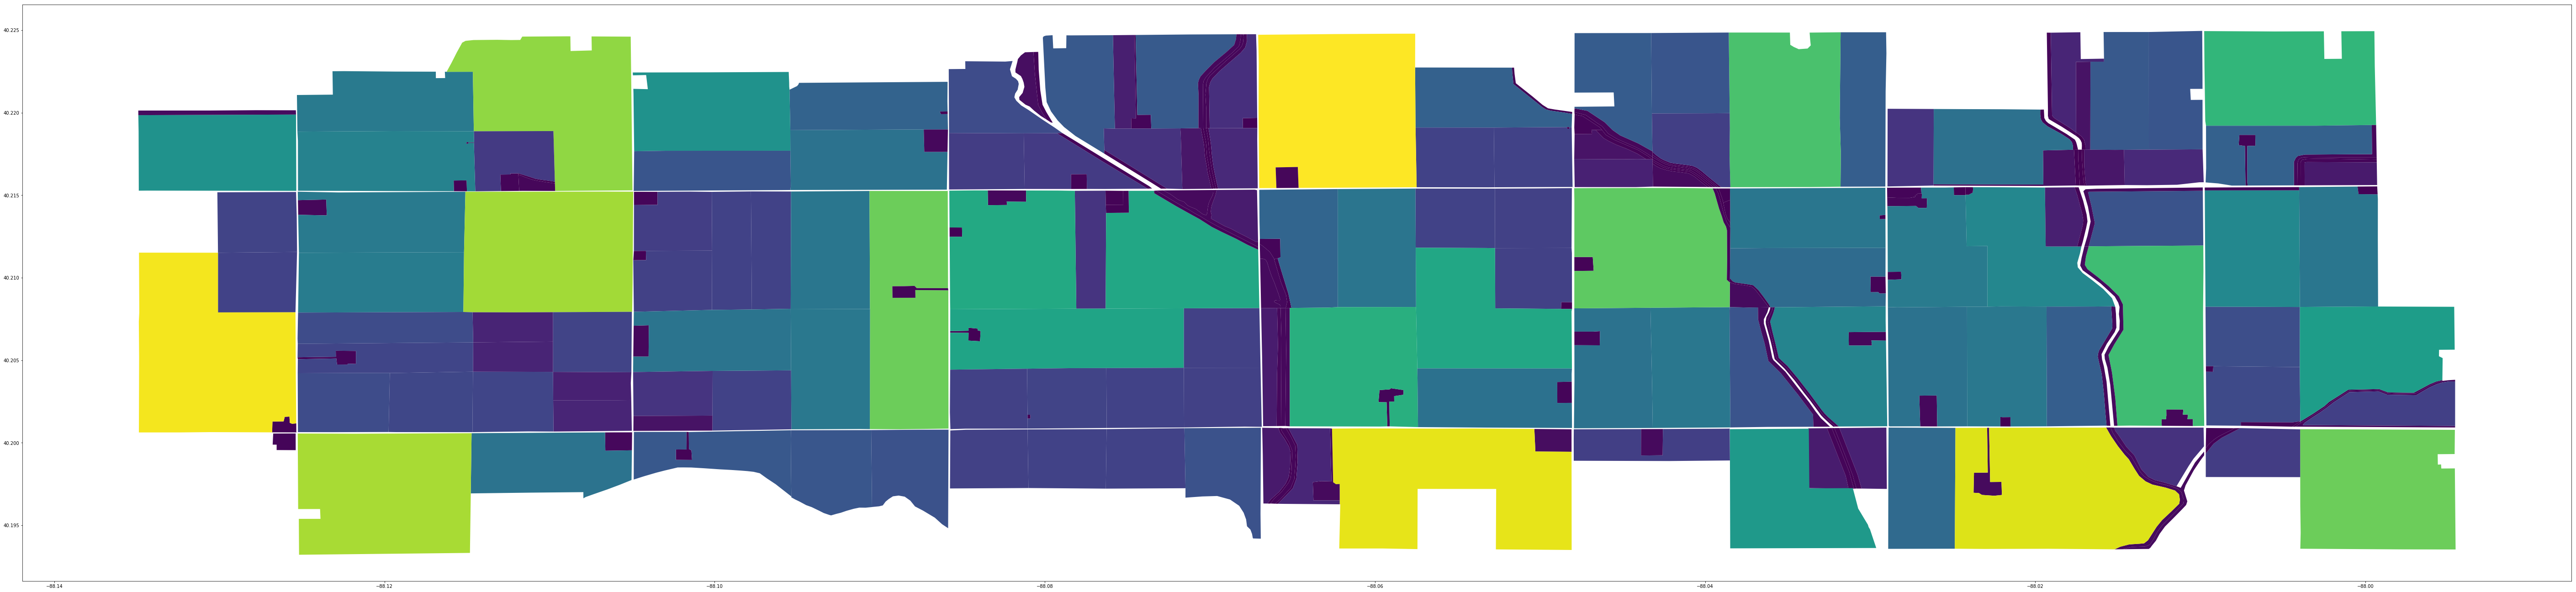

In [22]:
requestbody={'json':clu,'skipFailures':"on","destination":"C://Users"}

# Function to generate shapefiles from geojson
post_converttoshapefile(requestbody)


# reading shapefile and plotting
gdf = gpd.read_file('./shapefiles/OGRGeoJSON.shp')

gdf.plot(column='CALCACRES', cmap=None,figsize=(100, 100))